### Homework Linear Regression
The dataset you are working is Boston Housing Price

The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target.

For this assignment, your task is to:

1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets)

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff!

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

Hint: from sklearn.model_selection import train_test_split

Hint: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model

Hint: from sklearn.metrics import r2_score

Hint: from sklearn.metrics import mean_squared_error



#### 1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets)


In [60]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

# print(bos.head())


#### 2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff!

In [61]:
#bos

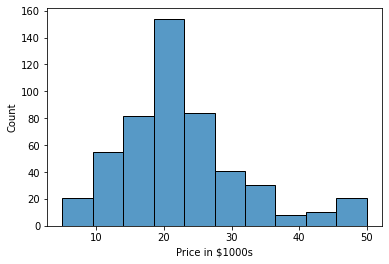

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(bos['PRICE'], bins=10)
plt.xlabel('Price in $1000s')
plt.show()

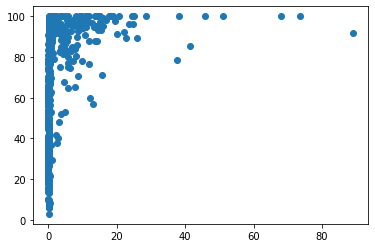

In [63]:
plt.scatter(bos['CRIM'],bos['AGE'])

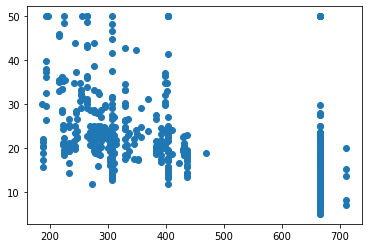

In [64]:
plt.scatter(bos['TAX'],bos['PRICE'])

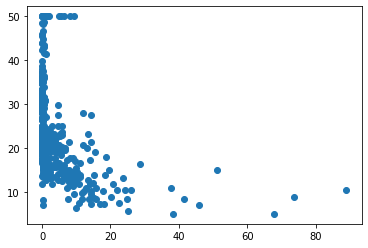

In [65]:
plt.scatter(bos['CRIM'],bos['PRICE'])

#### 3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

<AxesSubplot:>

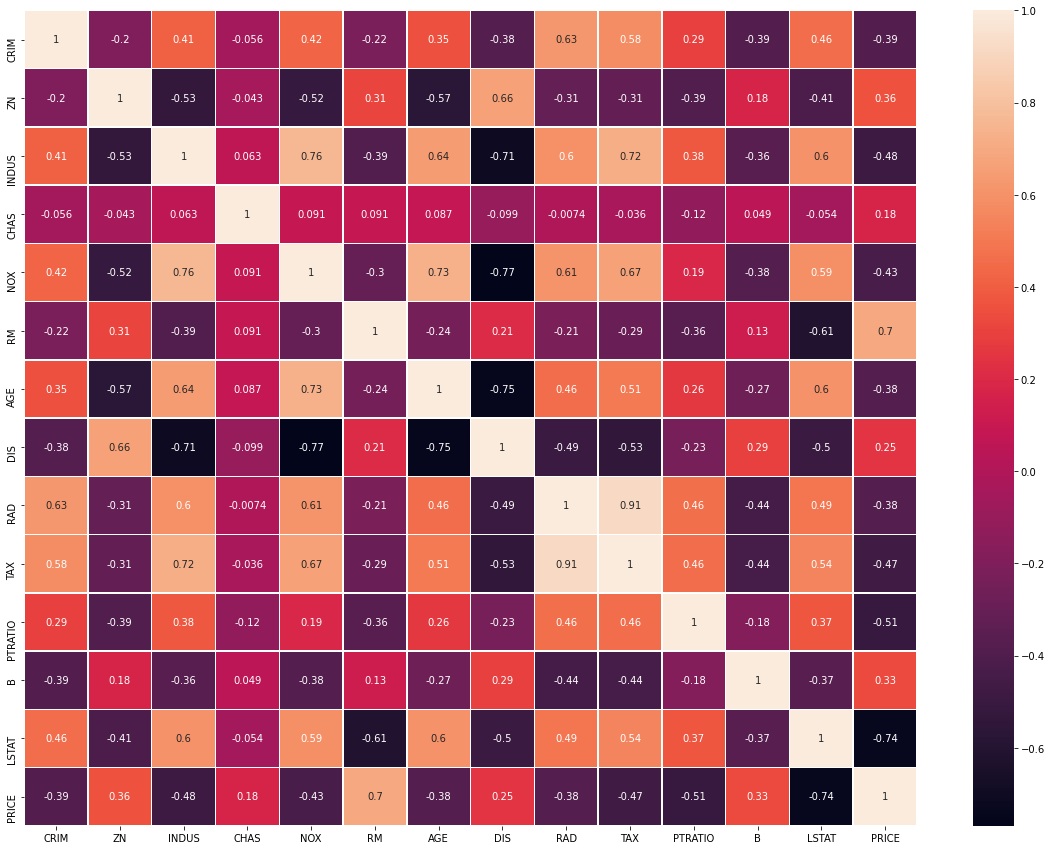

In [67]:
plt.subplots(figsize=(20,15))
sns.heatmap(bos.corr(), annot=True, linewidths=.5)

#### 4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


feature_cols = ["PRICE","CRIM"]
x_train, x_test, y_train, y_test = train_test_split(bos, bos[feature_cols], test_size=0.25, random_state=0)

lm =LinearRegression()
lm.fit(x_train, y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

y_pred = lm.predict(x_test)

print(y_pred)

print('r2 score is {}.'.format(r2_score(y_test, y_pred)))
print('Mean Squared Error is {}.'.format(mean_squared_error(y_test, y_pred)))


[ 2.30926389e-13 -1.68753900e-14]
[[-2.65425074e-16  1.38777878e-17  6.98226199e-17 -1.05620172e-14
   1.31552585e-14  2.09591865e-15 -3.86843335e-16 -9.33281230e-16
   2.98372438e-16  0.00000000e+00  1.56748529e-16 -6.83481050e-16
  -3.90529623e-16  1.00000000e+00]
 [ 1.00000000e+00 -1.11031902e-16 -3.26585016e-16  1.90180453e-16
   2.37664788e-15  4.52710363e-16 -8.40477782e-17 -6.83471417e-16
   3.59375583e-16 -4.42908007e-17  4.17123444e-17  1.04313415e-16
   2.01932401e-16 -2.29398709e-16]]
[[2.26000e+01 6.72400e-02]
 [5.00000e+01 9.23230e+00]
 [2.30000e+01 1.14250e-01]
 [8.30000e+00 2.48017e+01]
 [2.12000e+01 5.64600e-02]
 [1.99000e+01 6.27390e-01]
 [2.06000e+01 4.83567e+00]
 [1.87000e+01 6.15100e-02]
 [1.61000e+01 2.63548e+00]
 [1.86000e+01 2.28760e-01]
 [8.80000e+00 7.35341e+01]
 [1.72000e+01 1.40507e+01]
 [1.49000e+01 6.28807e+00]
 [1.05000e+01 2.43938e+01]
 [5.00000e+01 1.83377e+00]
 [2.90000e+01 5.56100e-02]
 [2.30000e+01 5.82401e+00]
 [3.33000e+01 4.01100e-02]
 [2.94000e+01

In [69]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(bos_stdscaled, boston.target, test_size=0.25, random_state=0)

bos_stdscaled = std_scaler.fit_transform(bos)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred=lr_reg.predict(X_test)

print(r2_score(y_test, y_pred))



1.0


In [70]:
from sklearn.preprocessing import MinMaxScaler

bos_minmaxscaled = minmax_scaler.fit_transform(bos)

X_train, X_test, y_train, y_test = train_test_split(bos_minmaxscaled, boston.target, test_size=0.25, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred=lr_reg.predict(X_test)

print(r2_score(y_test, y_pred))


1.0
